# 3. 비지도 학습과 데이터 전처리
## 3.3 데이터 전처리와 스케일 조정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import sklearn
import scipy
%matplotlib inline
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.size'] = 12.0

In [2]:
print("matplotlib.__version__: {}".format(mpl.__version__))
print("sklearn.__version__: {}".format(sklearn.__version__))
print("numpy.__version__: {}".format(np.__version__))
print("scipy.__version__: {}".format(scipy.__version__))

matplotlib.__version__: 3.0.0
sklearn.__version__: 0.20.0
numpy.__version__: 1.15.1
scipy.__version__: 1.1.0


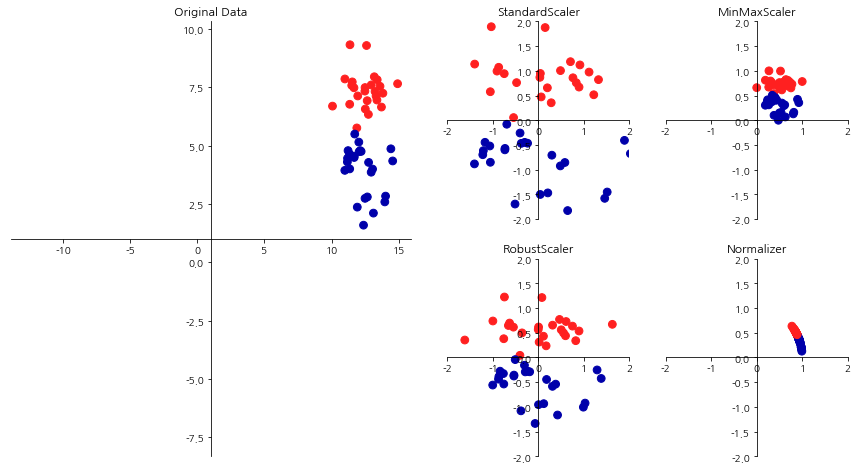

In [3]:
mglearn.plots.plot_scaling()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값: \n{}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값: \n{}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값: \n{}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: \n{}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: \n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값: 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Text(0.5, 1.0, 'Bad Scaled Data')

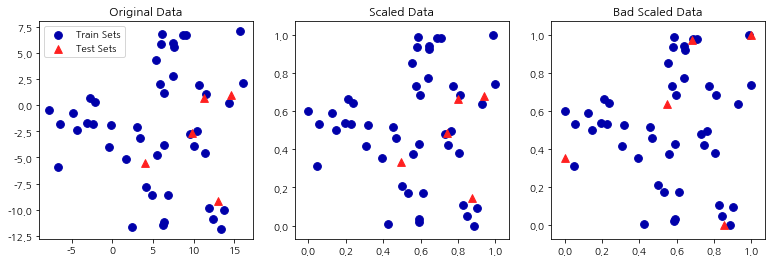

In [8]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=3)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=[mglearn.cm2(0)], label="Train Sets", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=[mglearn.cm2(1)], label="Test Sets", s=60)
axes[0].set_title("Original Data")
axes[0].legend(loc='upper left')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=[mglearn.cm2(0)], label="Train Sets", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=[mglearn.cm2(1)], label="Test Sets", s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=[mglearn.cm2(0)], label="Train Sets", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^', c=[mglearn.cm2(1)], label="Test Sets", s=60)
axes[2].set_title("Bad Scaled Data")

## 3.4 차원 축소, 특성 추출, 매니폴드 학습
### 3.4.1 주성분(PCA) 분석
PCA : Principal Component Analysis

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM 테스트 정확도: 0.96


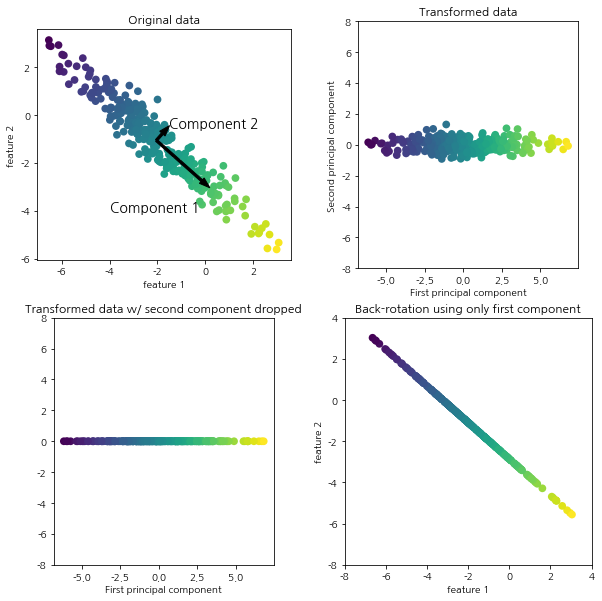

In [12]:
mglearn.plots.plot_pca_illustration()

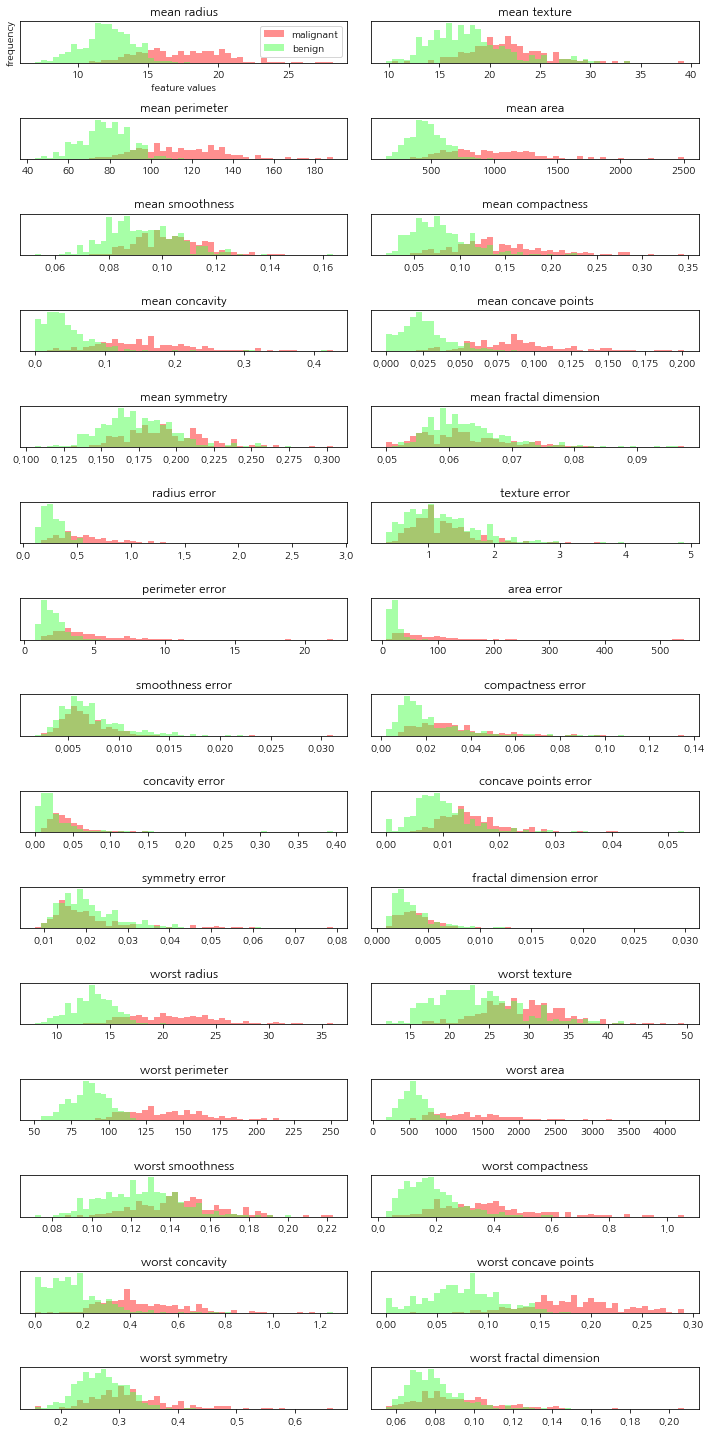

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("feature values")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'second principal feature')

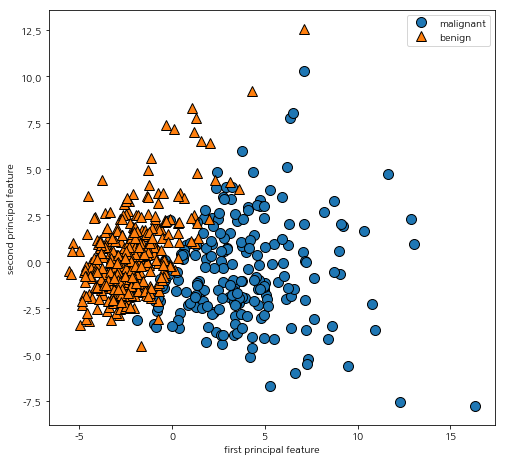

In [16]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first principal feature")
plt.ylabel("second principal feature")

In [17]:
print("PCA 주성분: \n{}".format(pca.components_))

PCA 주성분: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Components')

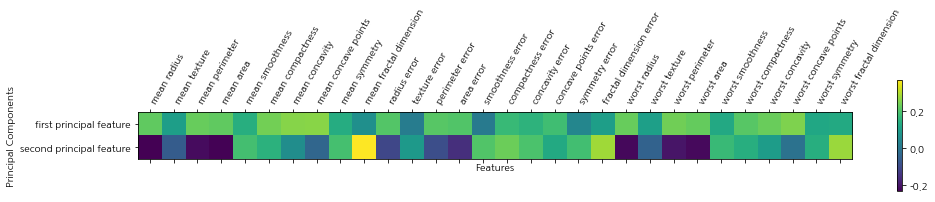

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first principal feature", "second principal feature"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal Components")

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

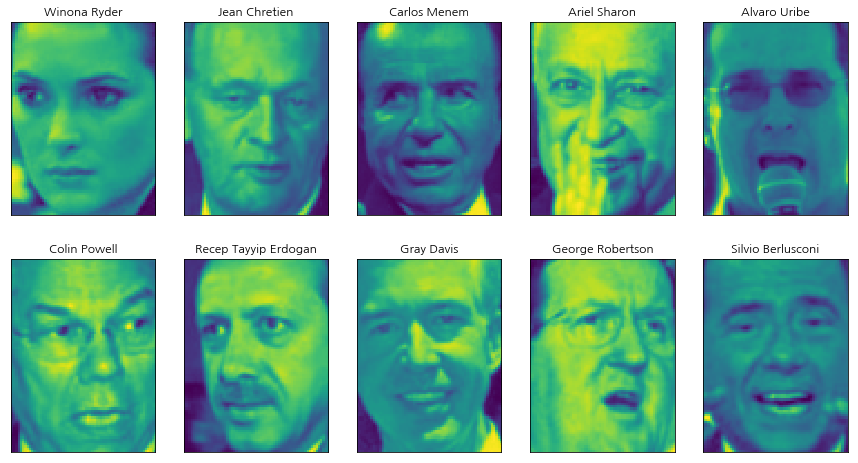

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [21]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [22]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='      ')
    if (i + 1) % 3 ==0:
        print()

Alejandro Toledo           39      Alvaro Uribe               35      Amelie Mauresmo            21      
Andre Agassi               36      Angelina Jolie             20      Ariel Sharon               77      
Arnold Schwarzenegger      42      Atal Bihari Vajpayee       24      Bill Clinton               29      
Carlos Menem               21      Colin Powell              236      David Beckham              31      
Donald Rumsfeld           121      George Robertson           22      George W Bush             530      
Gerhard Schroeder         109      Gloria Macapagal Arroyo    44      Gray Davis                 26      
Guillermo Coria            30      Hamid Karzai               22      Hans Blix                  39      
Hugo Chavez                71      Igor Ivanov                20      Jack Straw                 28      
Jacques Chirac             52      Jean Chretien              55      Jennifer Aniston           21      
Jennifer Capriati          42      Jennifer Lo

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

In [24]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


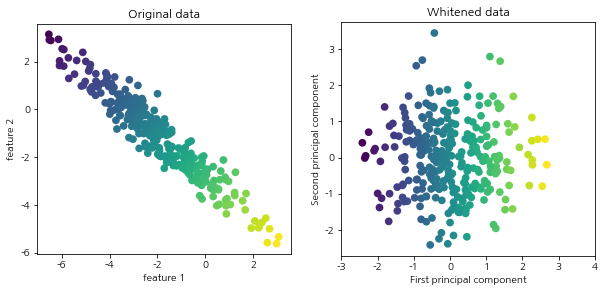

In [25]:
mglearn.plots.plot_pca_whitening()

In [26]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


pca_components_.shape: (100, 5655)


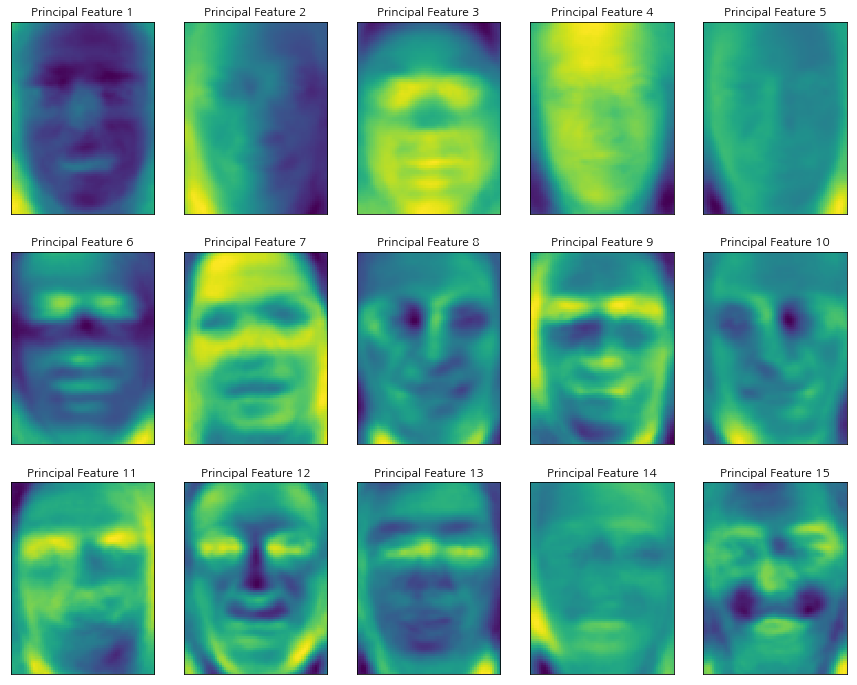

In [28]:
print("pca_components_.shape: {}".format(pca.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("Principal Feature {}".format(i+1))

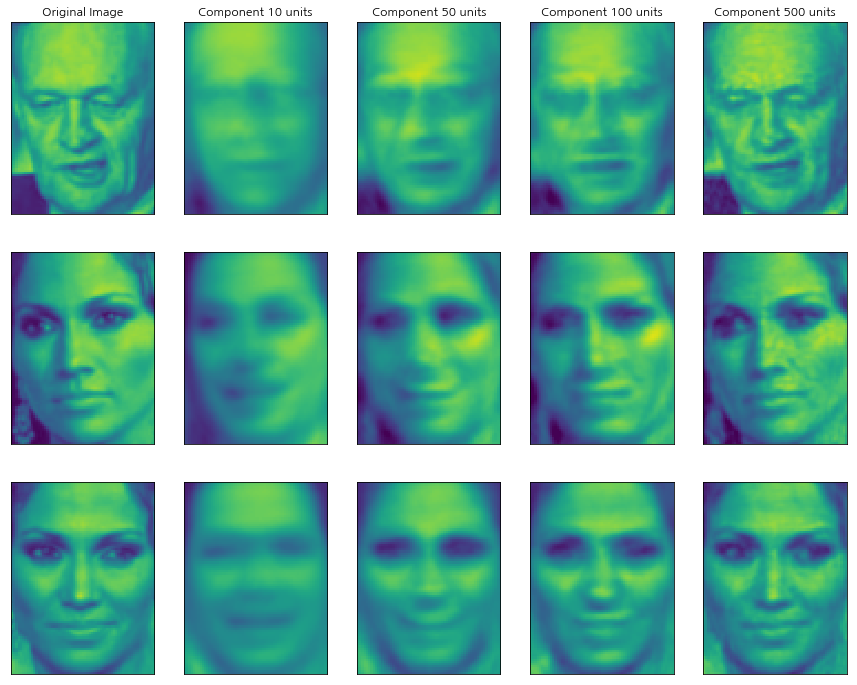

In [29]:
# mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

from sklearn.externals.joblib import Memory

memory = Memory(location="cache")


# @memory.cache
def pca_faces(X_train, X_test):
    # copy and pasted from nmf. refactor?
    # Build NMF models with 10, 50, 100, 500 components
    # this list will hold the back-transformd test-data
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        # build the NMF model
        pca = PCA(n_components=n_components)
        pca.fit(X_train)
        # transform the test data (afterwards has n_components many dimensions)
        X_test_pca = pca.transform(X_test)
        # back-transform the transformed test-data
        # (afterwards it's in the original space again)
        X_test_back = pca.inverse_transform(X_test_pca)
        reduced_images.append(X_test_back)
    return reduced_images


def plot_pca_faces(X_train, X_test, image_shape):
    reduced_images = pca_faces(X_train, X_test)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        ax[0].imshow(X_test[i].reshape(image_shape),
                     vmin=0, vmax=1)
        # plot the four back-transformed images
        for a, X_test_back in zip(ax[1:], reduced_images):
            a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)

    # label the top row
    axes[0, 0].set_title("Original Image")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("Component %d units" % n_components)
        

plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second Principal Component')

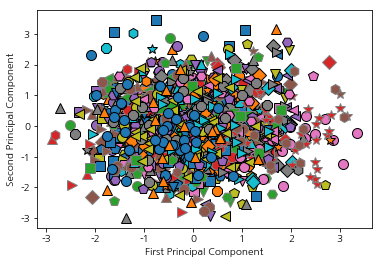

In [30]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:, 1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

### 3.4.2 비음수 행렬 분해(NMF)
NMF : non-negative matrix factoriaztion

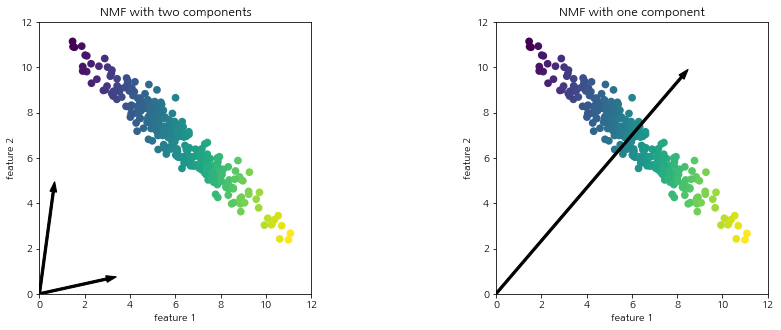

In [31]:
mglearn.plots.plot_nmf_illustration()

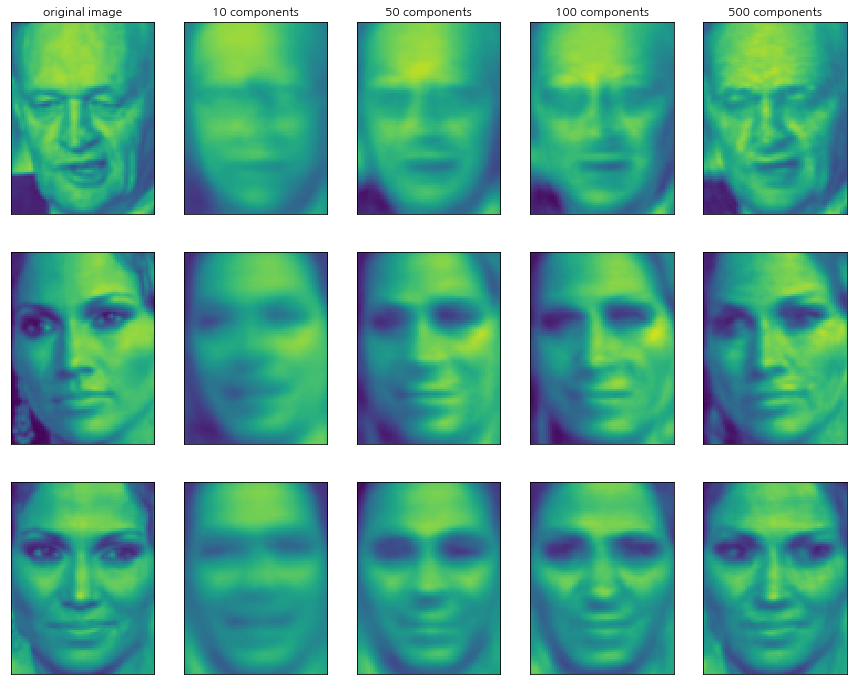

In [32]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

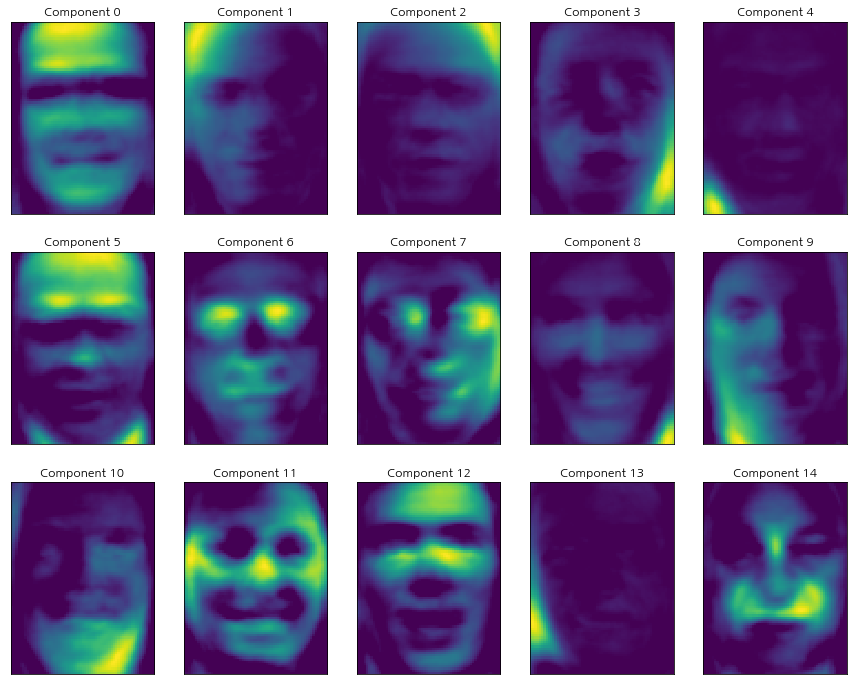

In [33]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Component {}".format(i))

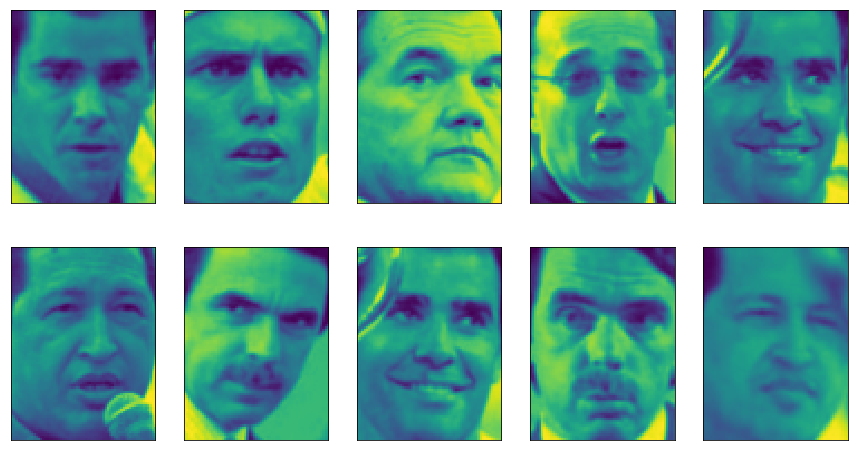

In [34]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

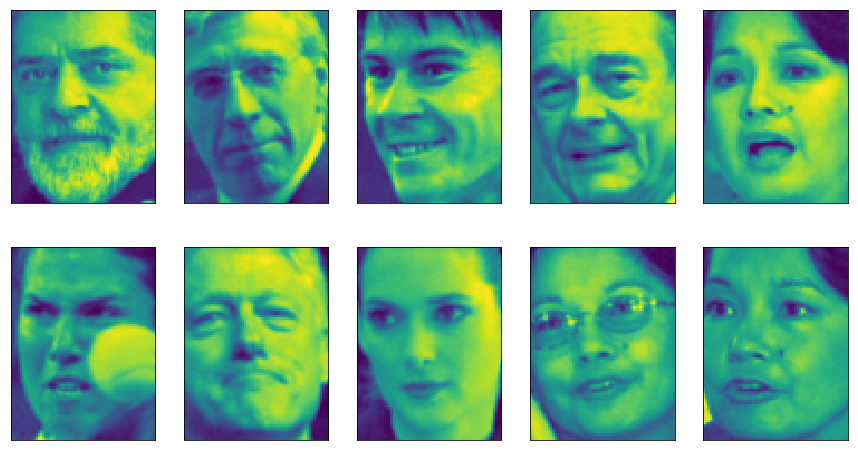

In [35]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'signal')

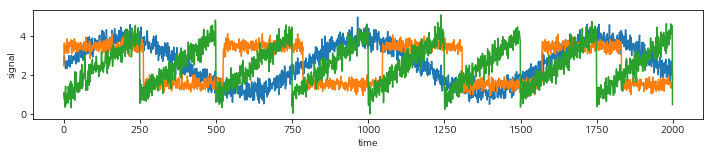

In [36]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel('time')
plt.ylabel('signal')

In [37]:
S.shape

(2000, 3)

In [38]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


Text(0.5, 1.0, 'measurement data')

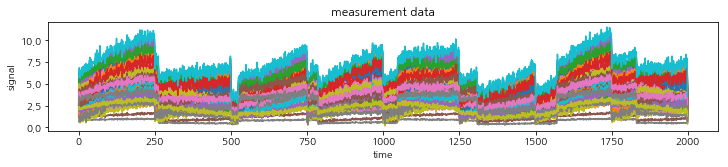

In [39]:
plt.figure(figsize=(12, 2))
plt.plot(X, '-')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('measurement data')

In [40]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [41]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

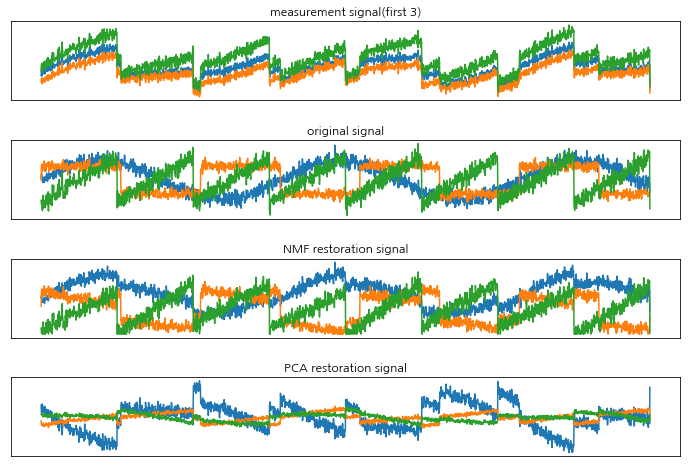

In [42]:
models = [X, S, S_, H]
names = ['measurement signal(first 3)', 'original signal', 'NMF restoration signal', 'PCA restoration signal']
fig, axes = plt.subplots(4, 1, figsize=(12, 8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

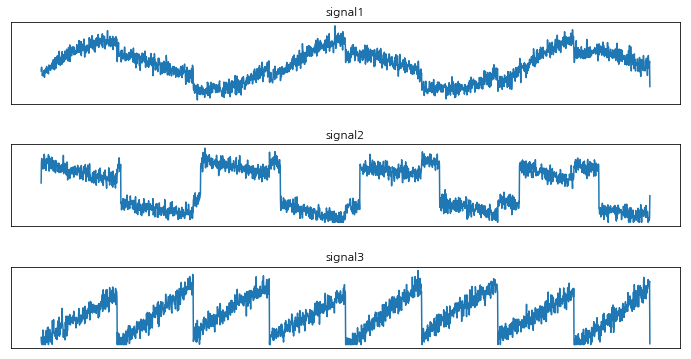

In [43]:
signal_names = ['signal1', 'signal2', 'signal3']
signals = [S_[:, 0], S_[:, 1], S_[:, 2]]
fig, axes = plt.subplots(3, 1, figsize=(12, 6), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for signal, name, ax in zip(signals, signal_names, axes):
    ax.set_title(name)
    ax.plot(signal, '-')

### 3.4.3 t-SNE를 이용한 매니폴드 학습
t-SNE : t-Distributed Stochastic Neighbor Embedding

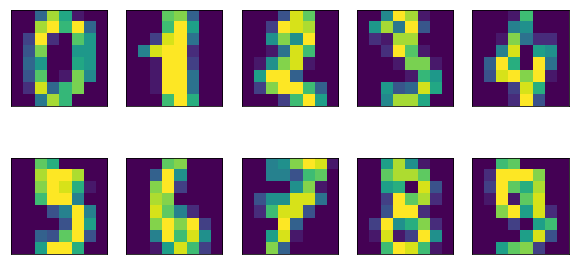

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'secone principal component')

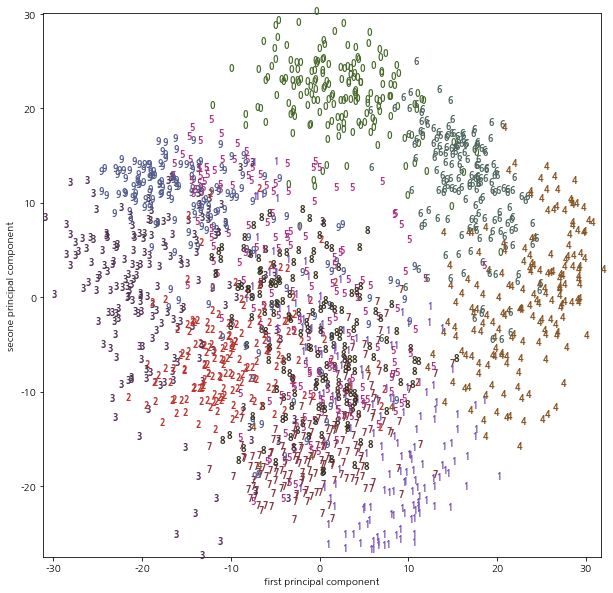

In [45]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("secone principal component")

Text(0, 0.5, 't-SNE feature 1')

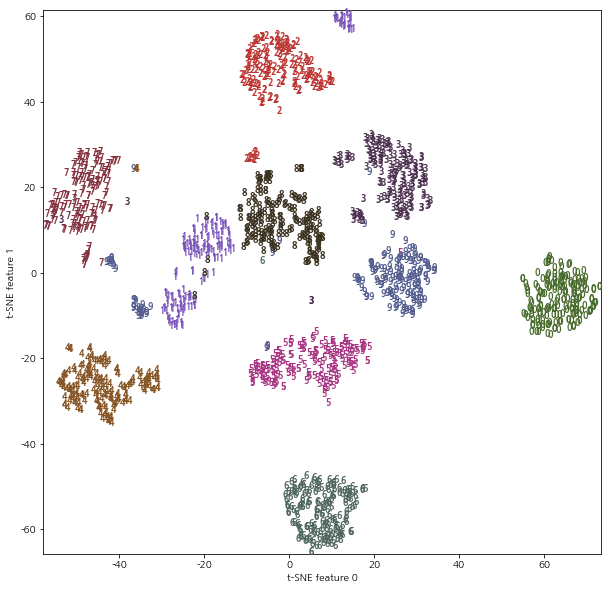

In [46]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

## 3.5 군집
### 3.5.1 k-평균 군집

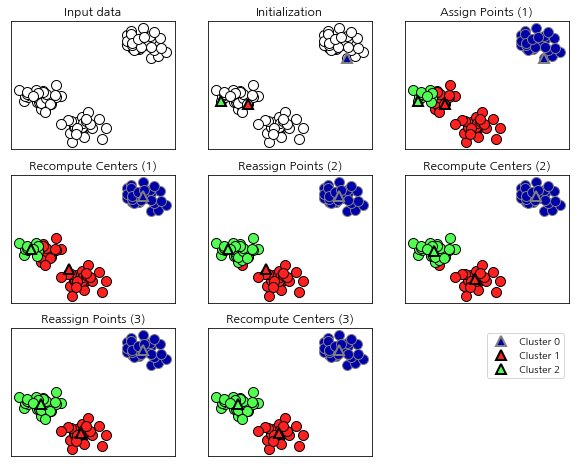

In [47]:
mglearn.plots.plot_kmeans_algorithm()

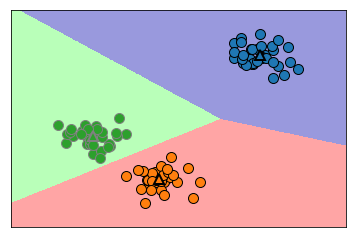

In [48]:
mglearn.plots.plot_kmeans_boundaries()

In [49]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(random_state=1)
kmeans =KMeans(n_clusters=3)
kmeans.fit(X)
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [50]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


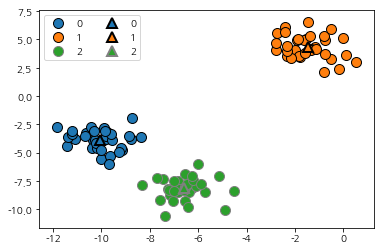

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.legend(ncol=2, loc='best')

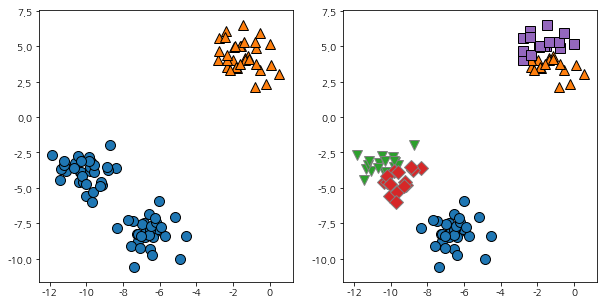

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
clusters = [2, 5]

for ax, cluster in zip(axes, clusters):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=ax)

Text(0, 0.5, '특성 1')

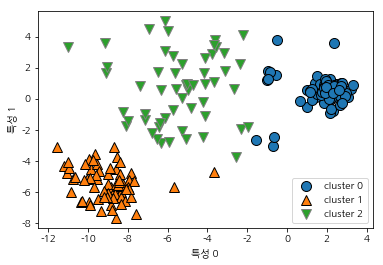

In [53]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [54]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
X[:10]

array([[ -5.21731084,  -0.88251839],
       [ -4.03581139,  -0.54810115],
       [ -9.10044792,  -6.98558537],
       [ -4.19774954,   0.51615813],
       [ -5.65394405,   0.34407201],
       [ -6.74269717,  -0.78645327],
       [-10.35588643,  -6.20504963],
       [ -4.25781065,   0.37458856],
       [ -8.57175762,  -4.10354394],
       [  2.76776688,   1.5187039 ]])

In [55]:
transformation = rng.normal(size=(2,2))
transformation

array([[ 0.60834549, -0.63667341],
       [-0.40887718,  0.85253229]])

In [56]:
X = np.dot(X, transformation)
X[:10]

array([[-2.81308591,  2.56934766],
       [-2.23106162,  2.10221987],
       [-2.67997004, -0.1614239 ],
       [-2.7647273 ,  3.11263698],
       [-3.58023458,  3.89304833],
       [-3.78032665,  3.62241918],
       [-3.76285366,  1.30331234],
       [-2.74338063,  3.03018366],
       [-3.53674465,  1.95900642],
       [ 1.06279514, -0.46741946]])

Text(0, 0.5, '특성 1')

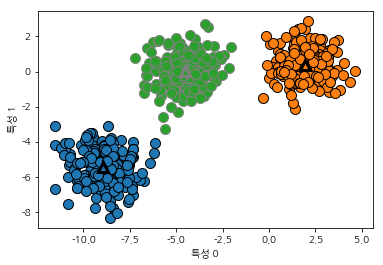

In [57]:
# 무작위로 클러스터 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

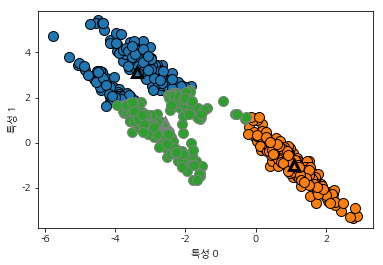

In [58]:
# 데이터가 길게 늘어지도록 변경 합니다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, 'Feature 1')

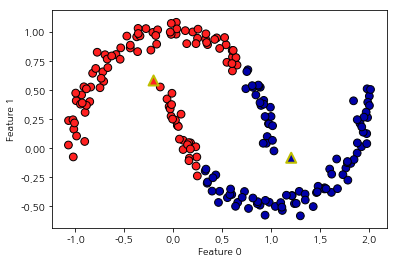

In [59]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', 
            c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='y')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=1500, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
# X_reconstructed_pca2 = np.dot(pca.transform(X_test), pca.components_)
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
# X_reconstructed_nmf2 = nmf.inverse_transform(nmf.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0, 0.5, 'nmf')

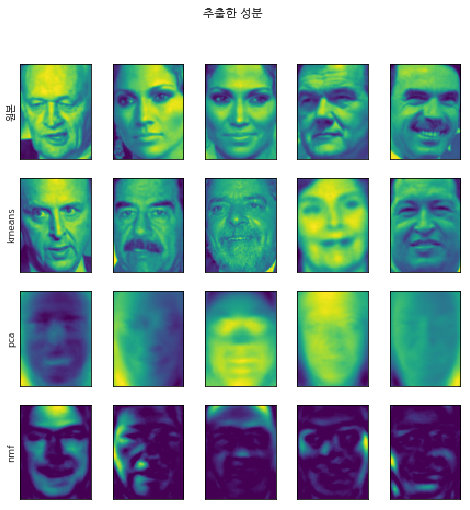

In [61]:
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, orig, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, X_test, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(comp_kmeans.reshape(image_shape))
    ax[2].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[3].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('원본')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

Text(0, 0.5, 'nmf')

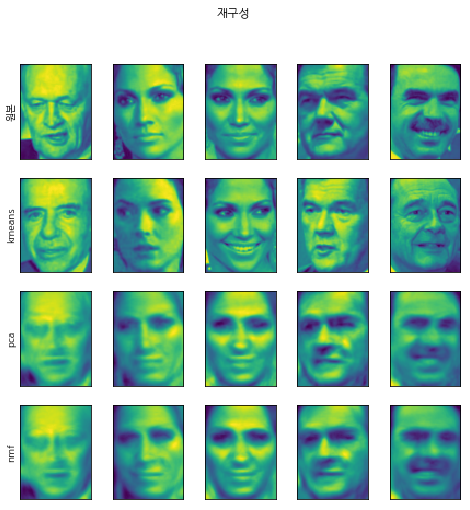

In [62]:
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('원본')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

클러스터 레이블:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


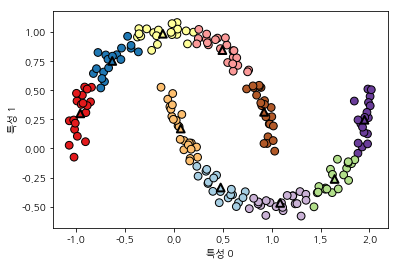

In [63]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^',
           c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
print('클러스터 레이블:\n{}'.format((y_pred)))

In [64]:
distance_features = kmeans.transform(X)
print('클러스터 거리 데이터의 형태: {}'.format(distance_features.shape))
print('클러스터 거리:\n{}'.format(distance_features))

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### 3.5.2 병합 군집

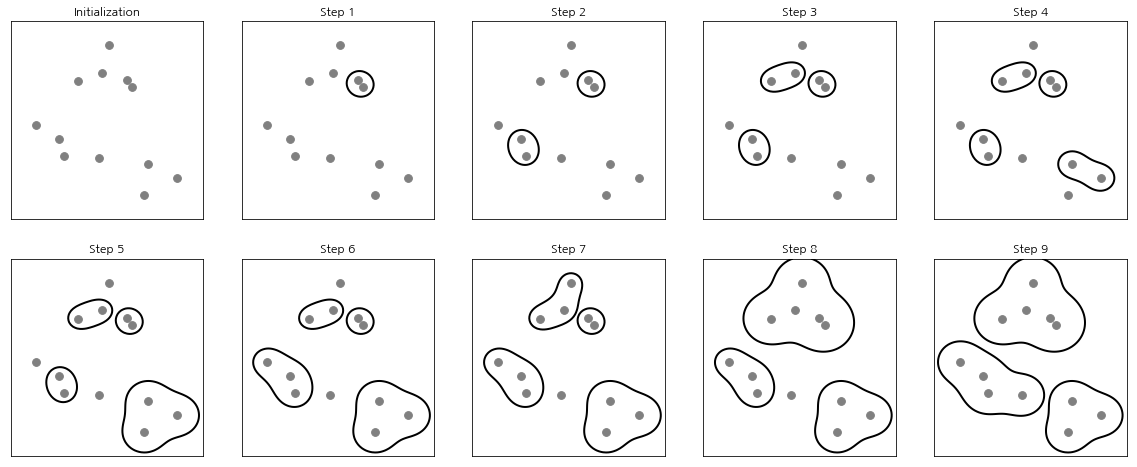

In [65]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, '특성 1')

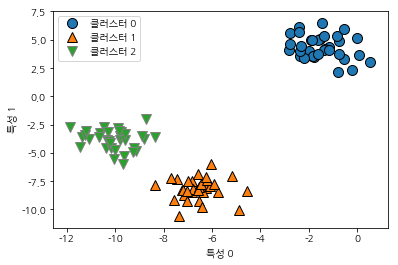

In [66]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

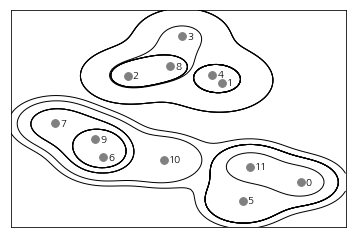

In [67]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, '클러스터 거리')

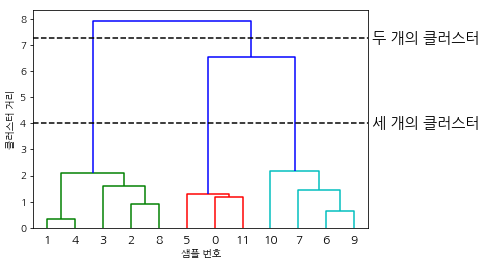

In [68]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='K')
ax.text(bounds[1], 7.25, ' 두 개의 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개의 클러스터', va='center', fontdict={'size': 15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

In [69]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('클러스터 레이블: {}'.format(clusters))

클러스터 레이블: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


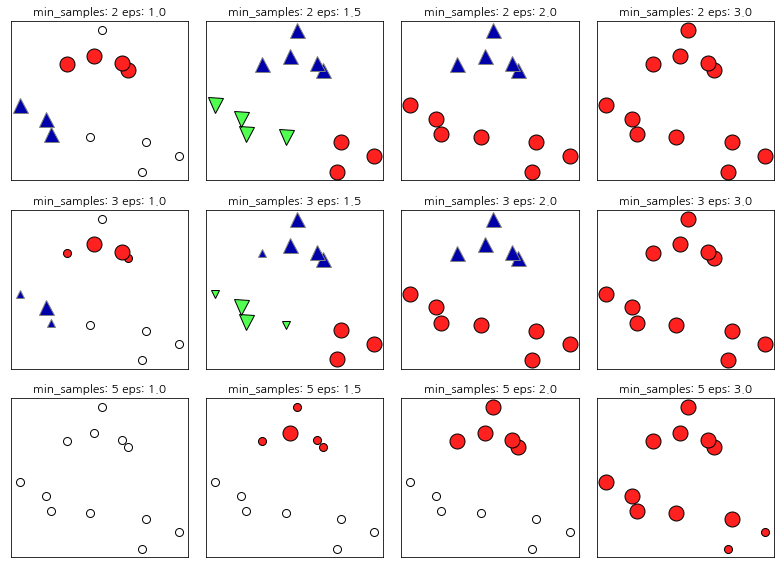

In [70]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

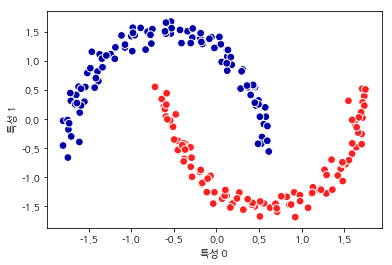

In [71]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# dbscan = DBSCAN(eps=0.2)
dbscan = DBSCAN(eps=0.5)      # default eps=0.5
# dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='white')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

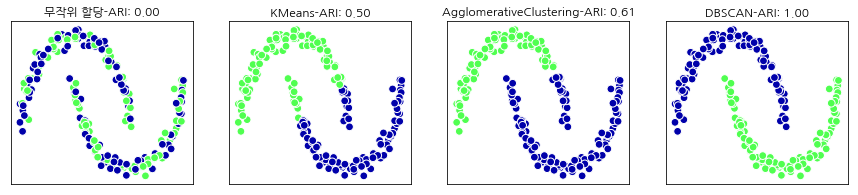

In [72]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='white')
axes[0].set_title('무작위 할당-ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='white')
    ax.set_title('{}-ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [73]:
from sklearn.metrics import accuracy_score

clusters1 = [ 0, 0, 1, 1, 0]
clusters2 = [ 1, 1, 0, 0, 1]

print('정확도: {:.2f}'.format(accuracy_score(clusters1, clusters2)))
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


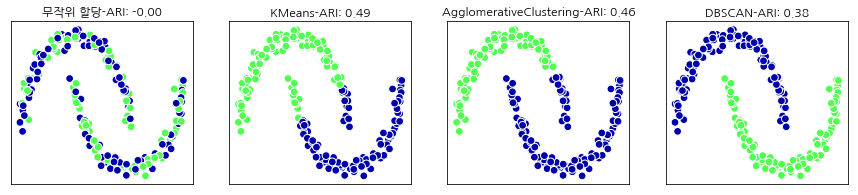

In [74]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='white')
axes[0].set_title('무작위 할당-ARI: {:.2f}'.format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='white')
    ax.set_title('{}-ARI: {:.2f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [76]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블: {}'.format(np.unique(labels)))

고유한 레이블: [-1]


In [77]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블: {}'.format(np.unique(labels)))

고유한 레이블: [-1  0]


In [78]:
print('클러스터 별 포인트 수: {}'.format(np.bincount(labels+1)))

클러스터 별 포인트 수: [  32 2031]


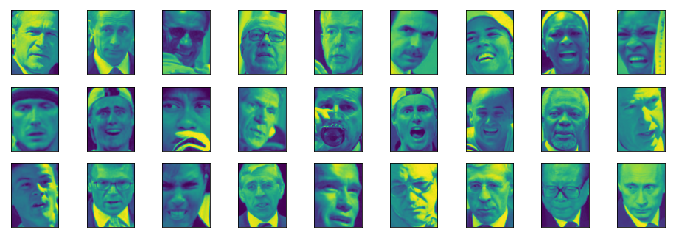

In [79]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

for eps in [1, 3, 5, 7, 9, 11, 13]:
    print('\neps: {}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('클러스터 수: {}'.format(len(np.unique(labels))))
    print('클러스터 크기: {}'.format(np.bincount(labels + 1)))

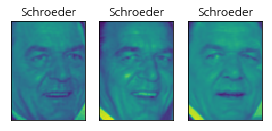

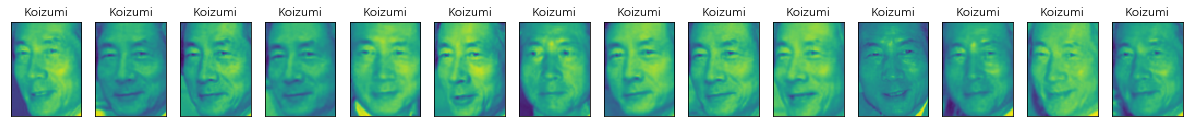

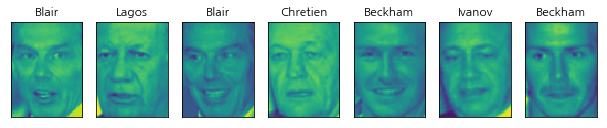

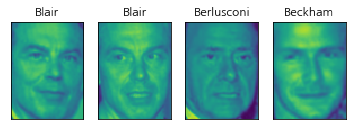

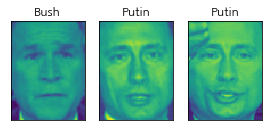

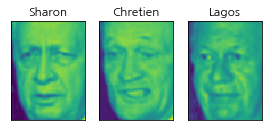

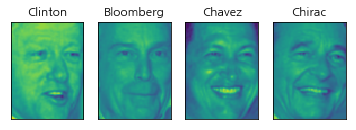

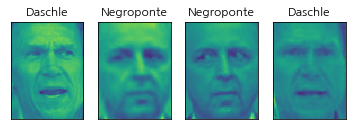

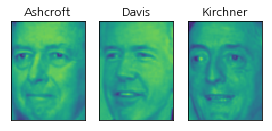

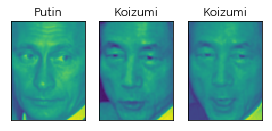

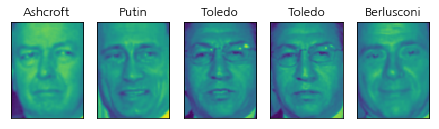

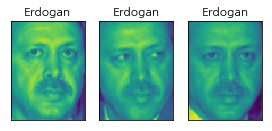

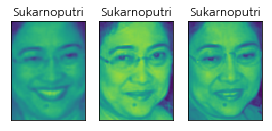

In [80]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [81]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('k-평균의 클러스터 별 크기: {}'.format(np.bincount(labels_km)))

k-평균의 클러스터 별 크기: [155 175 238  75 358 257  91 219 323 172]


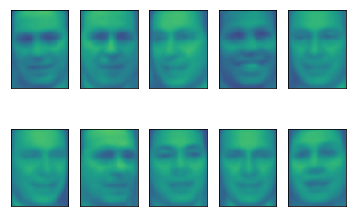

In [82]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()})
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

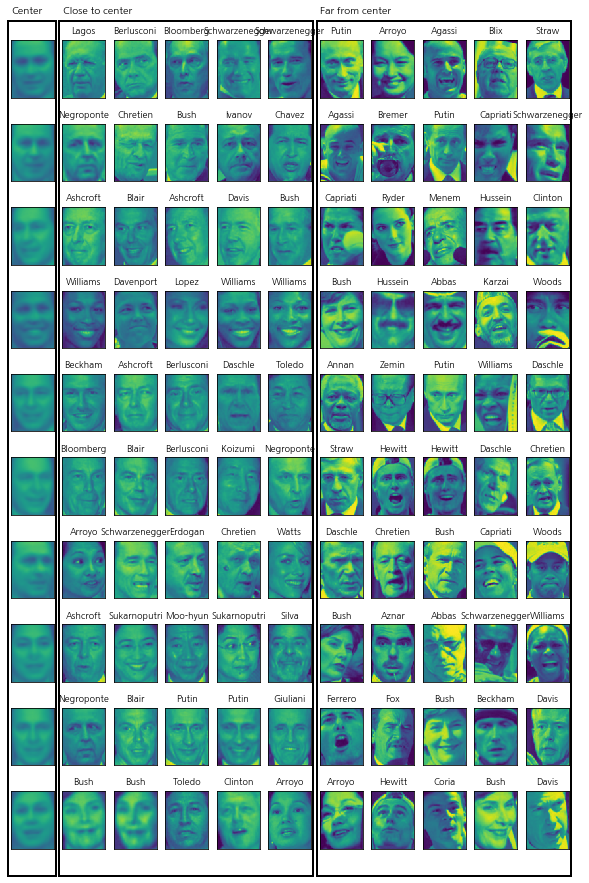

In [83]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [84]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 군집의 클러스터 별 크기: {}'.format(np.bincount(labels_agg)))

병합 군집의 클러스터 별 크기: [169 660 144 329 217  85  18 261  31 149]


In [85]:
print('ARL: {:.2f}'.format(adjusted_rand_score(labels_km, labels_agg)))

ARL: 0.09


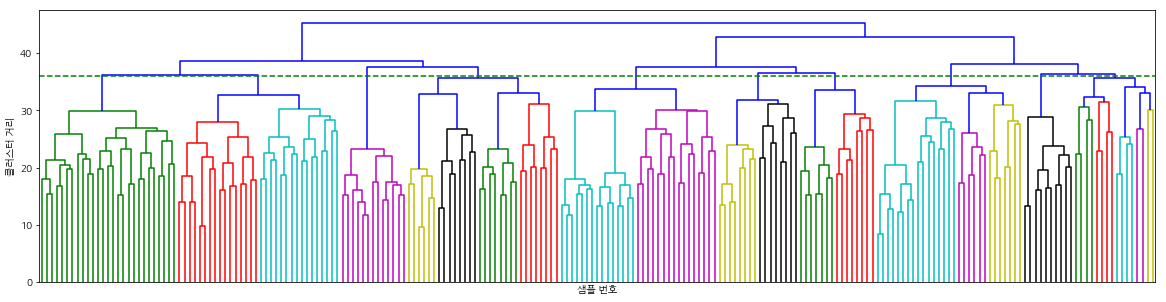

In [86]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='g')

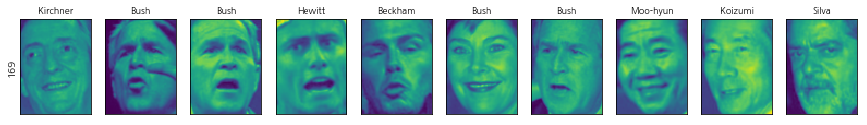

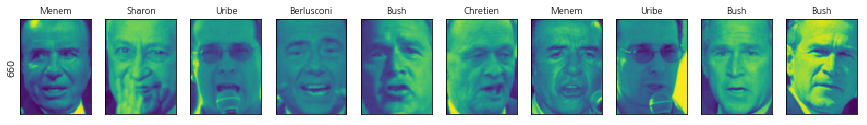

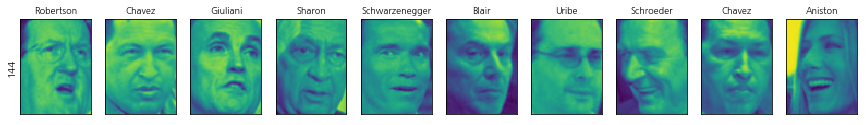

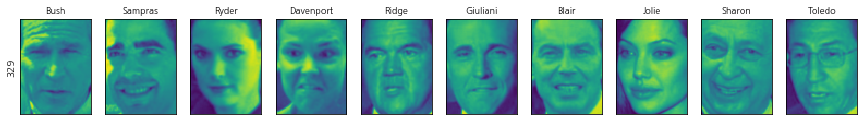

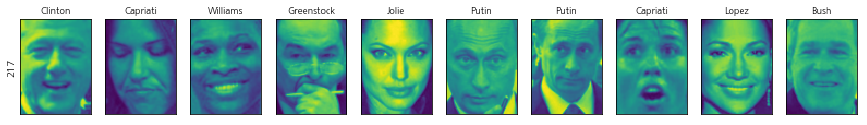

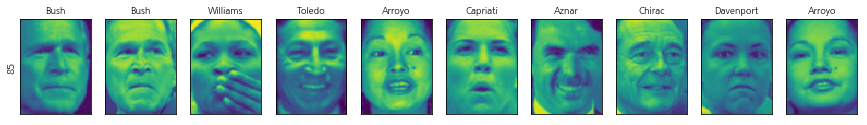

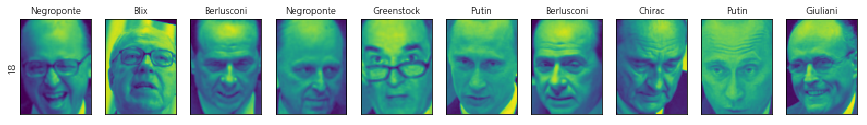

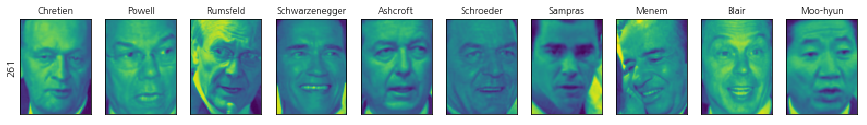

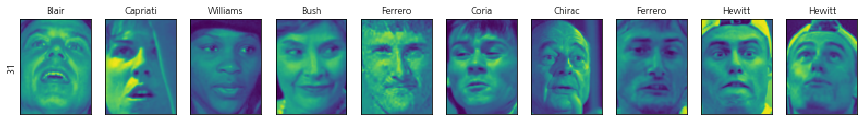

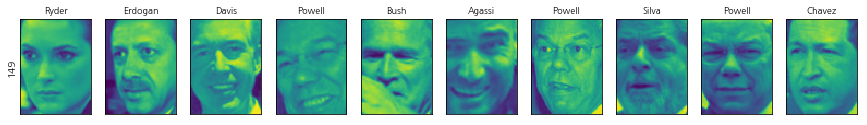

In [87]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, figsize=(15, 4), subplot_kw={'xticks': (), 'yticks': ()})
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

병합 구닙의 클러스트 별 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


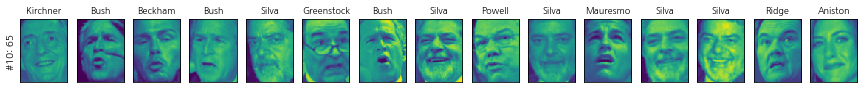

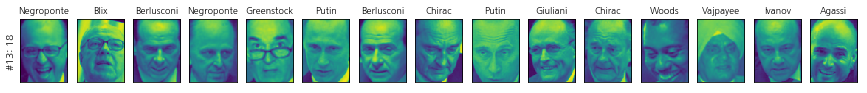

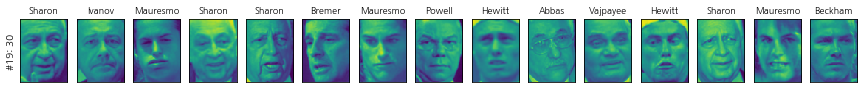

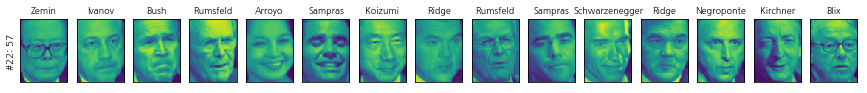

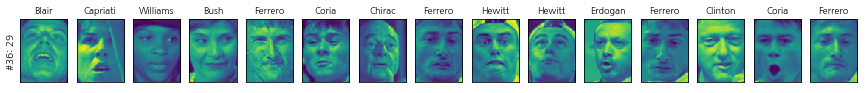

In [88]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 구닙의 클러스트 별 크기: {}'.format(np.bincount(labels_agg)))

n_clusters = 40
# for cluster in range(n_clusters):
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)